# Medicaid Beneficiary Data

## Importing Packages

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

## Reading Data

In [5]:
medicaid_b=pd.read_csv('/Users/sumeetmishra/desktop/medicaid_beneficiaria_raw_data.csv')
medicaid_b.head(15)

,Location,White,Black,Hispanic,Other,Total
0,United States,29253700,15517400,17748800,9812600,72332500
1,Alabama,512300,495800,57900,49400,1115400
2,Alaska,51300,8100,4900,75400,139800
3,Arizona,586100,119700,676300,285600,1667700
4,Arkansas,402000,187500,59000,70400,718900
5,California,2352400,1041600,6815400,2013300,12222700
6,Colorado,253600,50800,246900,193800,745100
7,Connecticut,413500,165700,242100,25400,846700
8,Delaware,111300,100600,40600,6600,259100
9,District of Columbia,5100,212300,20100,11600,249100


## Looking at Data types

In [6]:
medicaid_b.dtypes

Location    object
White        int64
Black       object
Hispanic     int64
Other        int64
Total        int64
dtype: object

## Cleaning data and changing data types

In [23]:
medicaid_b['Black'] = medicaid_b['Black'].str.replace('NSD','0').astype(int)
medicaid_b.head(15)
medicaid_b = medicaid_b.convert_objects(convert_numeric=True)
#medicaid_b.dtypes

,Location,White,Black,Hispanic,Other,Total
0,United States,29253700,15517400,17748800,9812600,72332500
1,Alabama,512300,495800,57900,49400,1115400
2,Alaska,51300,8100,4900,75400,139800
3,Arizona,586100,119700,676300,285600,1667700
4,Arkansas,402000,187500,59000,70400,718900
5,California,2352400,1041600,6815400,2013300,12222700
6,Colorado,253600,50800,246900,193800,745100
7,Connecticut,413500,165700,242100,25400,846700
8,Delaware,111300,100600,40600,6600,259100
9,District of Columbia,5100,212300,20100,11600,249100


## Plotting histogram for Total

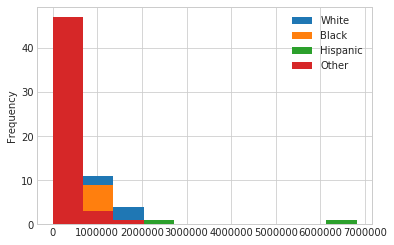

In [47]:
#medicaid_b['Total'].plot.hist()
#df = medicaid_b(np.random.randn(10,2), columns=list('White','Black','Hispanic','Other'))
#df.iloc[2:55]
#df.iloc[2:55].plot.hist()
#medicaid_b.iloc[1:52].plot.hist()
medicaid_b.iloc[1:52,0:5].plot.hist()

## Checking if any missing values

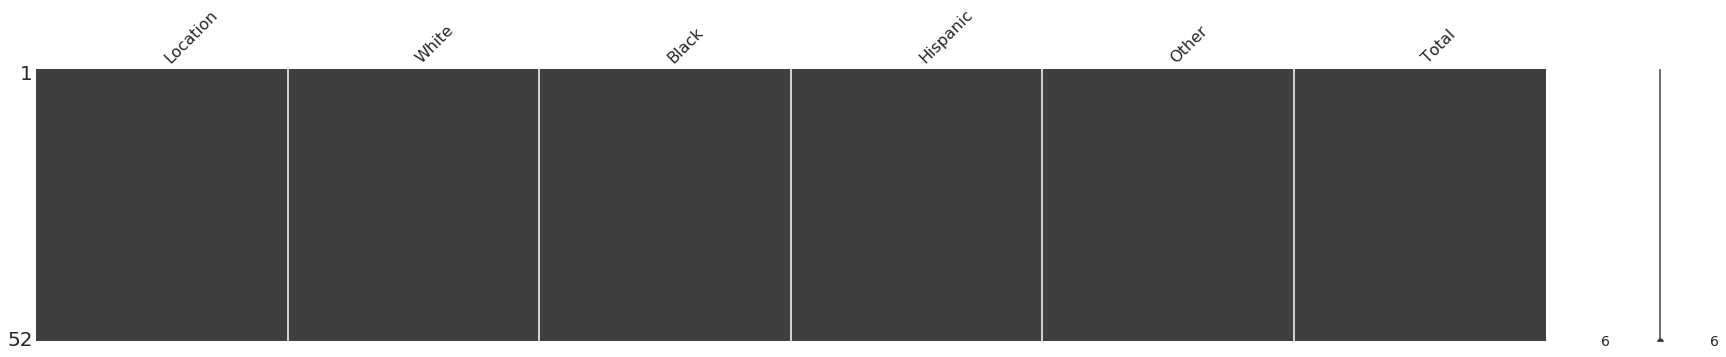

In [32]:
missingno.matrix(medicaid_b, figsize = (30,5))

## Data Exploration-Univariate

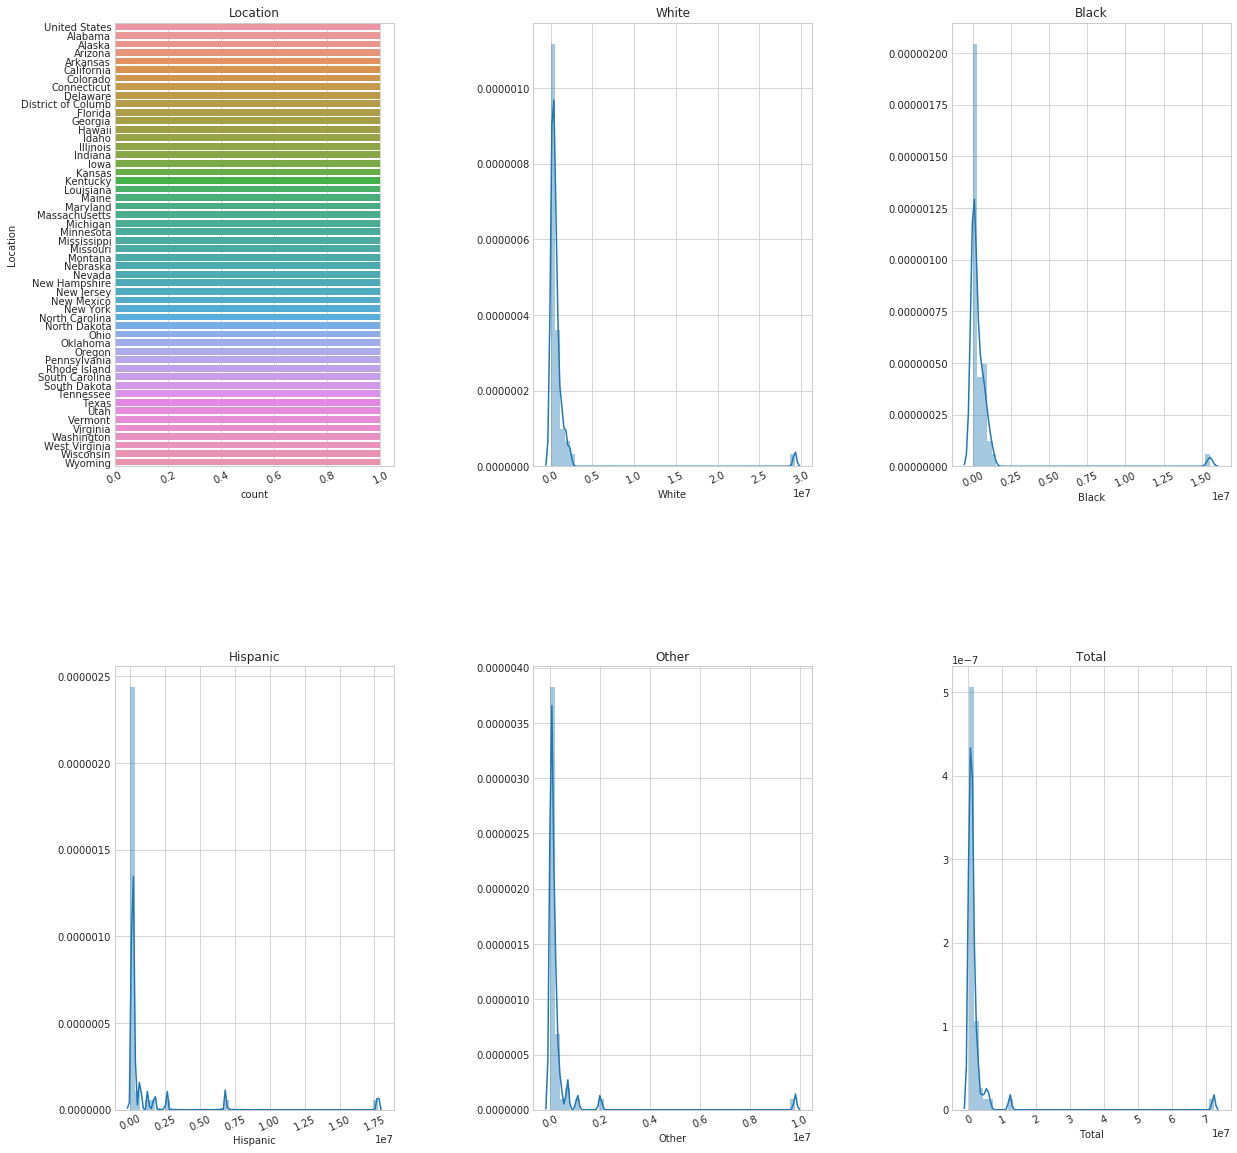

In [33]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(medicaid_b, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Checking if any Null values in data

In [34]:
medicaid_b.isnull().sum()

Location    0
White       0
Black       0
Hispanic    0
Other       0
Total       0
dtype: int64

## Data Description

In [35]:
medicaid_b.describe()

,White,Black,Hispanic,Other,Total
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,1.125142e+06,5.968192e+05,6.826481e+05,3.774115e+05,2.782015e+06
std,4.010480e+06,2.138339e+06,2.620572e+06,1.373528e+06,1.002853e+07
min,5.100000e+03,0.000000e+00,1.000000e+02,5.500000e+03,8.530000e+04
25%,2.296500e+05,2.007500e+04,1.810000e+04,3.922500e+04,3.570250e+05
50%,4.575500e+05,1.482000e+05,8.380000e+04,8.245000e+04,9.673500e+05
75%,7.526250e+05,5.223750e+05,2.232750e+05,2.001250e+05,1.569150e+06
max,2.925370e+07,1.551740e+07,1.774880e+07,9.812600e+06,7.233250e+07


## Plotting Mean by Location

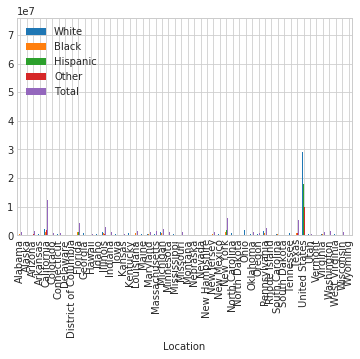

In [36]:
medicaid_b.groupby("Location").mean().plot(kind='bar')